$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

$\textbf{Preliminaries}$ 

The libraries used here are:

In [1]:
import numpy as np
import pandas as pd

Let's try to extract branching ratios from one paramcard:

In [2]:
Path_Paramcard = 'Paramcards_wRHC/param_card_M1000_gU1_8.dat'

In [3]:
with open(f'{Path_Paramcard}', 'r') as file:
    d = file.readlines()
    position = int(np.where(np.array(d) == '#  BR             NDA  ID1    ID2   ...\n')[0])
    print(position)    
    for i in range(position, len(d)):
        linea = d[i].rstrip().split(" ")
        print(linea)

173
['#', '', 'BR', '', '', '', '', '', '', '', '', '', '', '', '', 'NDA', '', 'ID1', '', '', '', 'ID2', '', '', '...']
['', '', '', '6.766588e-01', '', '', '2', '', '', '', '5', '', '-15', '#', '42.972']
['', '', '', '3.228033e-01', '', '', '2', '', '', '', '-16', '', '6', '#', '20.5']
['', '', '', '5.332396e-04', '', '', '2', '', '', '', '4', '', '-16', '#', '0.033864']
['', '', '', '4.656714e-06', '', '', '2', '', '', '', '2', '', '-16', '#', '0.00029573']


In [4]:
with open(f'{Path_Paramcard}', 'r') as file:
    d = file.readlines()
    position = int(np.where(np.array(d) == '#  BR             NDA  ID1    ID2   ...\n')[0])
    
    print(position) # Position of  '#  BR             NDA  ID1    ID2   ...\n', we want the next 2 rows. 
    btau_row = d[position + 1].rstrip().split(" ")
    tnu_row = d[position + 2].rstrip().split(" ")
    
    if ('5' in btau_row and '-15' in btau_row): 
        if ('6' in tnu_row and '-16' in tnu_row):  
            BR_btau = btau_row[3]
            BR_tnu = tnu_row[3]
    else: print('Something is wrong')
    
    print(BR_btau, BR_tnu)

173
6.766588e-01 3.228033e-01


Now, I will to generalize this code to extract all branching ratios from all paramcards:

In [5]:
RHC_Currents = ['wRHC', 'woRHC']
Masses = ["250",'275', '300', '350', '400', '450', '475',"500",'525', '550','575', '600', '625', '650', '675', '700', "750",'800', '850', '900', '950', "1000","1250","1500","1750","2000","2250","2500", "2750", "3000", "3250", "3500"]

In [6]:
Branching_Ratios = {}

for RHC_Current in RHC_Currents:
    Branching_Ratios[RHC_Current] = {}
        
    #First I have to create two arrays to save the value of btau BR and tnu BR.
    BR_btau_array = np.array([])
    BR_tnu_array = np.array([])

    #Now, I have to fill these arrays:
    for Mass in Masses:
        Path_Paramcard = f'Paramcards_{RHC_Current}/param_card_M{Mass}_gU1_8.dat'

        with open(Path_Paramcard, 'r') as file:
            d = file.readlines()

            # Position of  '#  BR             NDA  ID1    ID2   ...\n' 
            position = int(np.where(np.array(d) == '#  BR             NDA  ID1    ID2   ...\n')[0]) 

            # We want the next 2 rows.
            btau_row = d[position + 1].rstrip().split(" ")
            tnu_row = d[position + 2].rstrip().split(" ")

            if ('5' in btau_row and '-15' in btau_row): 
                if ('6' in tnu_row and '-16' in tnu_row):  
                    BR_btau = float(btau_row[3])
                    BR_tnu = float(tnu_row[3])

            else: print('Something is wrong')

            BR_btau_array = np.append(BR_btau_array, BR_btau)
            BR_tnu_array = np.append(BR_tnu_array, BR_tnu)

    #Finally, I have to save these arrays inside the Branching Ratios directory:        
    Branching_Ratios[RHC_Current]['btau'] = BR_btau_array
    Branching_Ratios[RHC_Current]['tnu'] = BR_tnu_array

Let's try to plot these Branching Ratios

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

In [8]:
Masses = [float(M)/1000 for M in Masses]

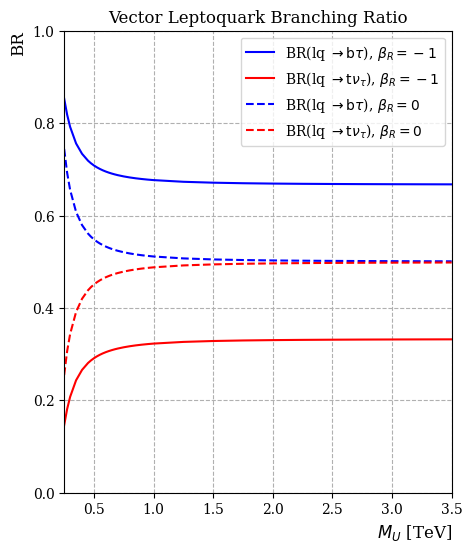

In [9]:
fig = plt.figure(figsize = (5,6))

plt.plot(Masses, Branching_Ratios['wRHC']['btau'], label = r'BR(lq $\rightarrow \mathrm{b} \tau$), $\beta_{R} = -1$', c = 'blue')
plt.plot(Masses, Branching_Ratios['wRHC']['tnu'], label = r'BR(lq $\rightarrow \mathrm{t} \nu_{\tau}$), $\beta_{R} = -1$' , c = 'red')

plt.plot(Masses, Branching_Ratios['woRHC']['btau'], label = r'BR(lq $\rightarrow \mathrm{b} \tau$), $\beta_{R} = 0$', linestyle = '--', c = 'blue')
plt.plot(Masses, Branching_Ratios['woRHC']['tnu'], label = r'BR(lq $\rightarrow \mathrm{t} \nu_{\tau}$), $\beta_{R} = 0$', linestyle = '--', c = 'red')

plt.grid(True, linestyle = '--')
plt.xlabel(r'$M_{U}$ [TeV]', loc= 'right', fontsize = 12)
plt.ylabel('BR', loc = 'top', fontsize = 12)
plt.ylim(0,1)
plt.xlim(0.25,3.5)
plt.legend()

plt.title('Vector Leptoquark Branching Ratio')
plt.savefig('VLQ_BranchingRatio.pdf', bbox_inches='tight')